# Apply the Frequency Domain Activity Correction to the Kecks HD 34411 data

In [2]:
from fdac import fdac

In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as ex
from finufft import nufft1d3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from scipy.stats import trim_mean, chi2
from math import ceil

plt.rcParams.update({"font.size" : 14})
plt.rcParams.update({"axes.labelsize" : 14})

## Load the data

In [13]:
data = pd.read_csv("data/HD34411.tsv", sep = '\t', skiprows = 46)
data.columns = ['Target', 'BJD', 'RV (m/s)', 'e_RV (m/s)', 'S', 'H', 'Count', 'Exp', 'Ndata']
data.head()

,Target,BJD,RV (m/s),e_RV (m/s),S,H,Count,Exp,Ndata
0,HD34411,2.451898e+06,-5.29,1.29,0.1496,-1.0,75333,13,183
1,HD34411,2.452129e+06,-1.05,1.28,0.1322,-1.0,89375,11,183
2,HD34411,2.452134e+06,-1.13,1.35,0.1401,-1.0,99107,9,183
3,HD34411,2.452243e+06,-3.56,1.41,0.1335,-1.0,95858,10,183
4,HD34411,2.452536e+06,-0.95,1.30,0.1346,-1.0,101422,8,183


Text(0.5, 1.0, 'RV Measuremenst for HD 34411')

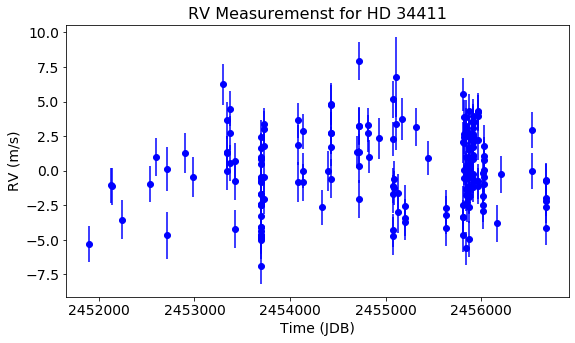

In [17]:
#plot the RV
plt.figure(figsize=(9,5))
plt.errorbar(data['BJD'], data['RV (m/s)'], yerr = data['e_RV (m/s)'], fmt = 'o', color = 'b')
plt.ylabel('RV (m/s)')
plt.xlabel('Time (JDB)')
plt.title('RV Measuremenst for HD 34411', fontsize = 16)

Text(0.5, 1.0, 'Photometry')

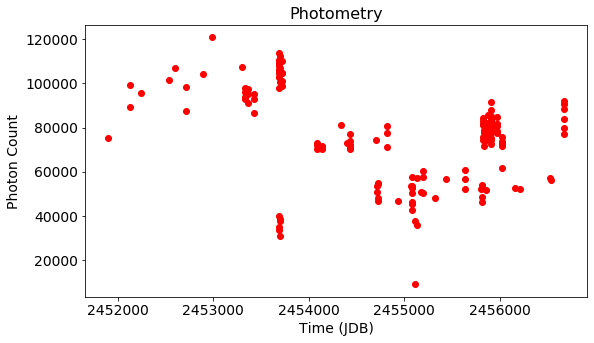

In [18]:
#plot the photometry
plt.figure(figsize=(9,5))
plt.errorbar(data['BJD'], data['Count'], fmt = 'o', color = 'r')
plt.ylabel('Photon Count')
plt.xlabel('Time (JDB)')
plt.title('Photometry', fontsize = 16)

In [16]:
#check if any of the columns have nan values
data.isnull().values.any()

False

## Apply the acitivy correction module 

In [19]:
#try first without the photometry
time =  data['BJD']
obs = np.array([data['RV (m/s)'], data['S'], data['H']])
names = ['RV', 'S index', 'H index']
fdac_hd34411 = fdac(time, obs, names)

Mean Nyquist frequency:  0.01904604007010226 

Median Nyquist frequency:  510.20395436615553 

10% trimmed Mean Nyquist frequency:  0.035294994401059245 

20% trimmed mean Nyqusit frequenct:  0.06720257065120629 



Number of Rayleigh resolution units: 183
Maximum frequency (cycles/day): 0.0381
Rayleigh resolution: 0.0002


D:\Anaconda\lib\site-packages\pandas\core\indexes\base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


IndexError: list index out of range

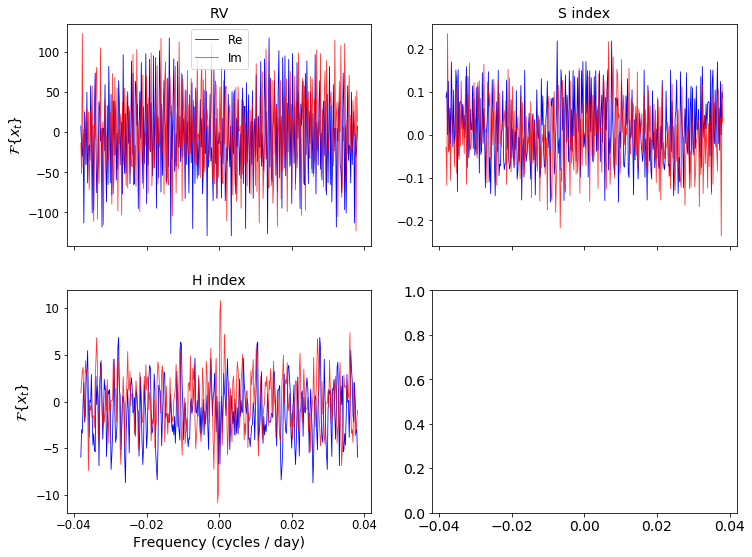

In [20]:
fdac_hd34411.frequency_grid(fdac_hd34411.Nyq_meandt) #try mean dt
fdac_hd34411.computeNFFT()
fdac_hd34411.plotNFFT()

Real
----
Intercept: 
 -5.3376316508092385
Coefficients: 
 [ 2.41017620e+01  5.91487326e-08 -2.75914379e+00 -5.26617055e-08]

Imaginary
---------
Intercept: 
 -1.7140029895823294e-09
Coefficients: 
 [ 4.13575566e-08  2.43384649e+01 -1.70908550e-08 -2.79354964e+00]


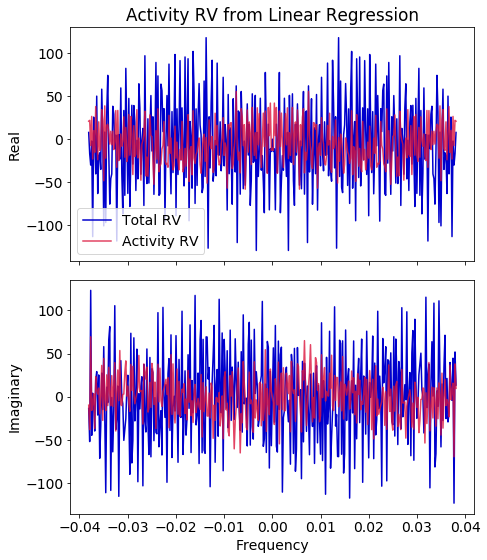

In [21]:
fdac_hd34411.linear_reg()
fdac_hd34411.fftac_plot()

21.225870468407805 7.731512737958429e-08
Raw standard deviation 2.7931
Variance ratio: 0.2153
Should be 1: 1.0
Should be equal: 1.2961 1.2961
Std dev of clean RV: 2.7244293896631437


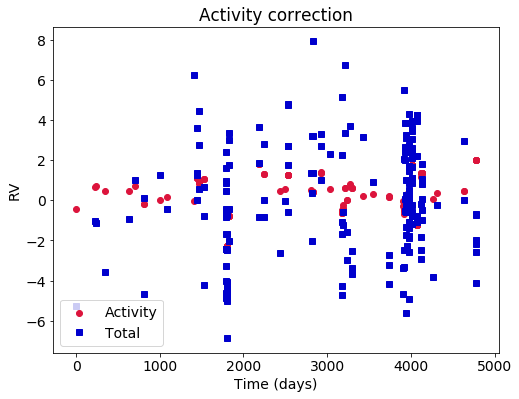

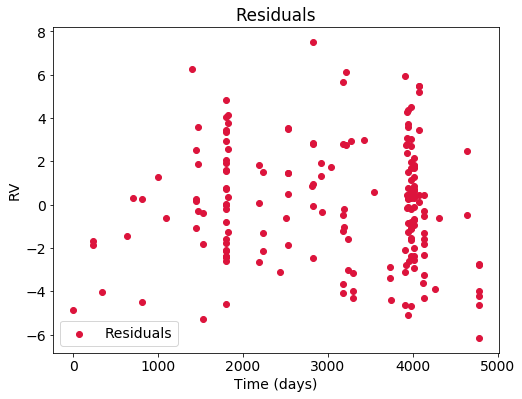

In [22]:
fdac_hd34411.inverfft()
fdac_hd34411.activityplot(clean = True)

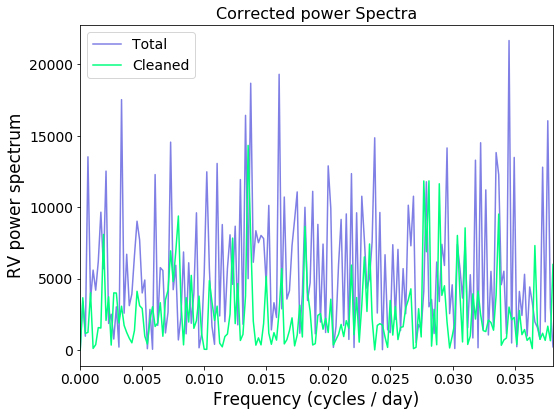

In [23]:
fdac_hd34411.residual_powplot()

### Try including the Photometry

In [37]:
obs_photo = np.array([data['RV (m/s)'], data['S'], data['H'], data['Count']])
names_photo = ['RV', 'S index', 'H index', 'Flux']
fdac_photo = fdac(time, obs_photo, names_photo)

Mean Nyquist frequency:  0.01904604007010226 

Median Nyquist frequency:  510.20395436615553 

10% trimmed Mean Nyquist frequency:  0.035294994401059245 

20% trimmed mean Nyqusit frequenct:  0.06720257065120629 



Number of Rayleigh resolution units: 183
Maximum frequency (cycles/day): 0.0381
Rayleigh resolution: 0.0002


D:\Anaconda\lib\site-packages\pandas\core\indexes\base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


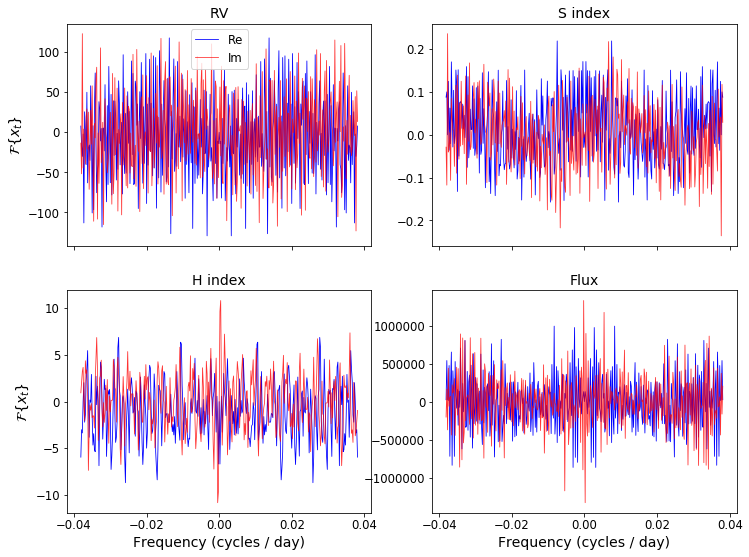

In [38]:
fdac_photo.frequency_grid(fdac_photo.Nyq_meandt)
fdac_photo.computeNFFT()
fdac_photo.plotNFFT()

Real
----
Intercept: 
 -5.337631650809238
Coefficients: 
 [ 2.17712422e+01  6.88857948e-08 -2.00555444e+00 -6.38531551e-08
 -1.13644094e+01  3.38010992e-08]

Imaginary
---------
Intercept: 
 -1.7140035888011789e-09
Coefficients: 
 [ 3.41754260e-08  2.16836300e+01 -1.15482144e-08 -2.03696219e+00
 -8.42439007e-09 -1.12045971e+01]


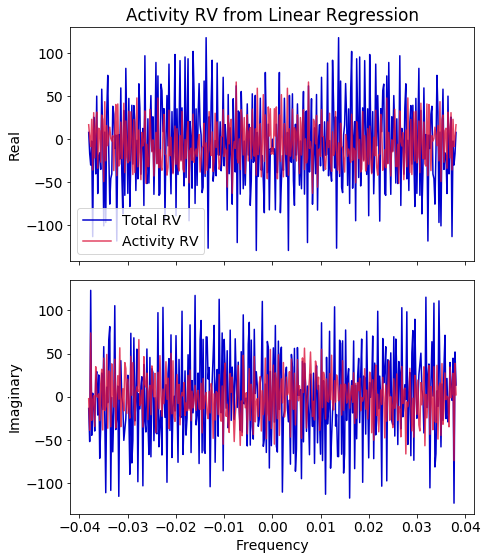

In [39]:
fdac_photo.linear_reg()
fdac_photo.fftac_plot()

17.655161142251593 6.512903186651082e-08
Raw standard deviation 2.7931
Variance ratio: 0.2580
Should be 1: 1.0
Should be equal: 1.4188 1.4188
Std dev of clean RV: 2.7495550362156354


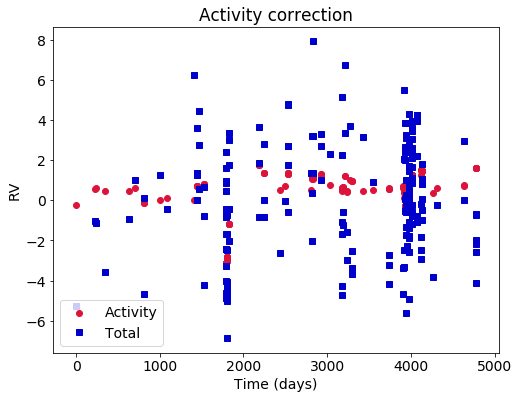

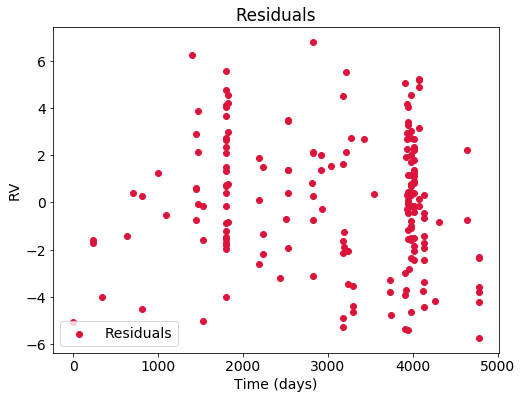

In [40]:
fdac_photo.inverfft()
fdac_photo.activityplot(clean = True)

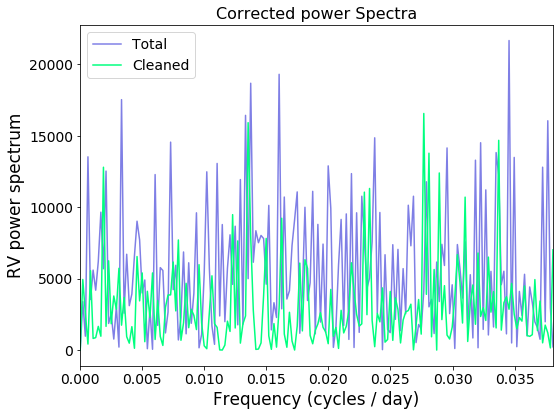

In [41]:
fdac_photo.residual_powplot()